In [1]:
import warnings
warnings.filterwarnings("ignore")

from sklearn._config import set_config
set_config(print_changed_only=False)

In [2]:
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()

columns = ['sepal_length','sepal_width','petal_length','petal_width']
df = pd.DataFrame(iris.data , columns=columns)
df['target'] = iris.target

df.head(3)

,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


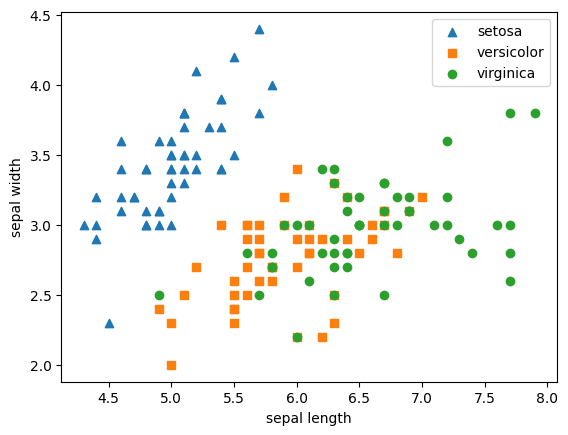

In [3]:
import matplotlib.pyplot as plt

markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df[df['target']==i]['sepal_length']
    y_axis_data = df[df['target']==i]['sepal_width']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.show()

In [4]:
from sklearn.preprocessing import StandardScaler

scaled_df = StandardScaler().fit_transform(df.iloc[:, :-1])

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca.fit(scaled_df)
iris_pca = pca.transform(scaled_df)

iris_pca.shape

(150, 2)

In [6]:
pca_columns=['pca_component_1','pca_component_2']
df_pca = pd.DataFrame(iris_pca, columns=pca_columns)
df_pca['target'] = iris.target

df_pca.head(3)

,pca_component_1,pca_component_2,target
0,-2.264703,0.480027,0
1,-2.080961,-0.674134,0
2,-2.364229,-0.341908,0


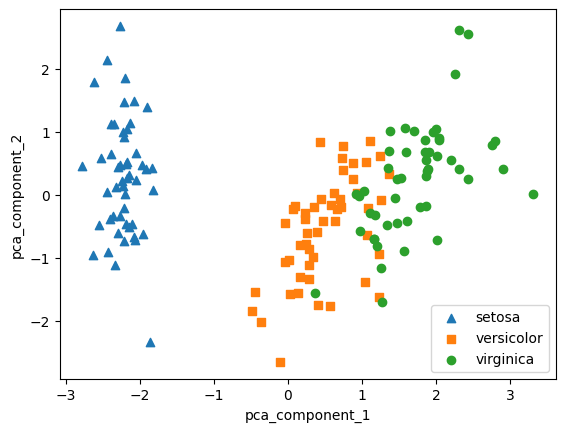

In [7]:
markers=['^', 's', 'o']

for i, marker in enumerate(markers):
    x_axis_data = df_pca[df_pca['target']==i]['pca_component_1']
    y_axis_data = df_pca[df_pca['target']==i]['pca_component_2']
    plt.scatter(x_axis_data, y_axis_data, marker=marker, label=iris.target_names[i])

plt.legend()
plt.xlabel('pca_component_1')
plt.ylabel('pca_component_2')
plt.show()

In [8]:
pca.explained_variance_ratio_

array([0.72962445, 0.22850762])

In [9]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

rcf = RandomForestClassifier(random_state=42)
scores = cross_val_score(rcf, iris.data, iris.target, scoring='accuracy', cv=3)

print('원본 데이터 교차 검증 개별 정확도:', scores)
print('원본 데이터 평균 정확도:', np.mean(scores))

원본 데이터 교차 검증 개별 정확도: [0.98 0.94 0.98]
원본 데이터 평균 정확도: 0.9666666666666667


In [10]:
pca_X = df_pca[['pca_component_1', 'pca_component_2']]
scores_pca = cross_val_score(rcf, pca_X, iris.target, scoring='accuracy', cv=3)

print('PCA 변환 데이터 교차 검증 개별 정확도:',scores_pca)
print('PCA 변환 데이터 평균 정확도:', np.mean(scores_pca))

PCA 변환 데이터 교차 검증 개별 정확도: [0.88 0.88 0.9 ]
PCA 변환 데이터 평균 정확도: 0.8866666666666667
